In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])

In [4]:
df.drop(columns=['Time'], inplace=True)

In [5]:
X = df.drop(columns=['class'])
y = df['class']

In [6]:
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [8]:
rf_model = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [9]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:14:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [11]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f'Random Forest Accuracy: {rf_accuracy:.4f}, AUC: {rf_auc:.4f}')
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}, AUC: {xgb_auc:.4f}')

Random Forest Accuracy: 0.9995, AUC: 1.0000
XGBoost Accuracy: 0.9996, AUC: 1.0000


In [12]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

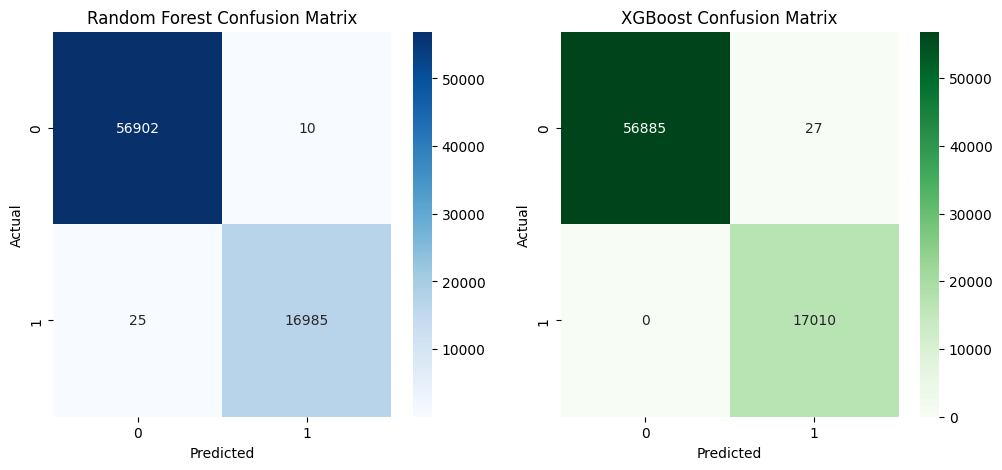

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

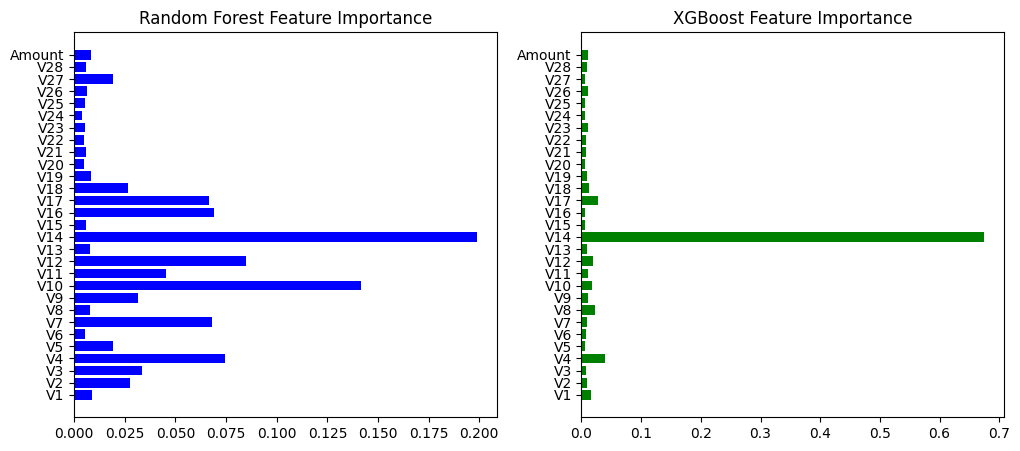

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh(X.columns, rf_importance, color='blue')
plt.title('Random Forest Feature Importance')

plt.subplot(1, 2, 2)
plt.barh(X.columns, xgb_importance, color='green')
plt.title('XGBoost Feature Importance')
plt.show()